In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem, ttest_ind
from matplotlib import pyplot as plt
%matplotlib notebook

In [60]:
# Read in AFL / CIO data (2700 records)

salary = "ceo_salary_aflcio.csv"
salary_df = pd.read_csv(salary, encoding="utf-8")
salary_df.head()

,Symbol,Name,CEO,Year,Salary
0,TSLA,"Tesla, Inc.",Elon Musk,2018,2284044884
1,AAXN,"Axon Enterprise, Inc.",Patrick Smith,2018,246026710
2,DISCA,"Discovery, Inc.",David Zaslav,2018,129499005
3,ORCL,Oracle Corp.,Mark Hurd,2018,108295023
4,OMF,"OneMain Holdings, Inc.",Jay Levine,2018,71532583


In [61]:
#Import Company data

consfin_csv = "company_data.csv"
com_df = pd.read_csv(consfin_csv)
com_df.head()

,Symbol,Company,Sector,Price,PE_Ratio,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.810000e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [62]:
#Merge two dataframes on Ticker symbol

salary_co = pd.merge(salary_df, com_df, on="Symbol")
salary_co.head()

,Symbol,Name,CEO,Year,Salary,Company,Sector,Price,PE_Ratio,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,DISCA,"Discovery, Inc.",David Zaslav,2018,129499005,Discovery Communications-A,Consumer Discretionary,22.87,11.00,0.000000,1.96,30.250,15.99,8.763757e+09,2.100000e+09,1.804088,1.50,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ORCL,Oracle Corp.,Mark Hurd,2018,108295023,Oracle Corp.,Information Technology,46.84,18.81,1.555146,2.20,53.140,40.01,2.020000e+11,1.654500e+10,5.256165,3.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,DIS,The Walt Disney Co.,Robert Iger,2018,65645214,The Walt Disney Company,Consumer Discretionary,101.35,17.78,1.603665,5.70,116.100,96.20,1.580000e+11,1.254400e+10,3.963556,3.82,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,FOXA,"Twenty-First Century Fox, Inc.",James Murdoch,2018,50263861,Twenty-First Century Fox Class A,Consumer Discretionary,34.56,17.81,0.998336,1.59,39.135,24.81,4.402709e+10,5.280000e+09,2.108032,4.11,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,EL,"The Estee Lauder Companies, Inc.",Fabrizio Freda,2018,48753819,Estee Lauder Cos.,Consumer Staples,131.46,37.78,1.128350,3.35,138.740,81.69,4.954326e+10,2.478000e+09,3.952258,10.82,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [64]:
sector_ceo = salary_co[["Symbol", "Company", "Sector", "PE_Ratio", "CEO", 'Salary', 'Market Cap']]
sector_ceo.head()                     

,Symbol,Company,Sector,PE_Ratio,CEO,Salary,Market Cap
0,DISCA,Discovery Communications-A,Consumer Discretionary,11.00,David Zaslav,129499005,8.763757e+09
1,ORCL,Oracle Corp.,Information Technology,18.81,Mark Hurd,108295023,2.020000e+11
2,DIS,The Walt Disney Company,Consumer Discretionary,17.78,Robert Iger,65645214,1.580000e+11
3,FOXA,Twenty-First Century Fox Class A,Consumer Discretionary,17.81,James Murdoch,50263861,4.402709e+10
4,EL,Estee Lauder Cos.,Consumer Staples,37.78,Fabrizio Freda,48753819,4.954326e+10


In [43]:
#Calculate average Fortine 500 salary is $14.1mil
avg_salary = sector_ceo["Salary"].mean()
avg_salary

14158485.777777778

In [65]:
#Calculate average PE Ratio
avg_peratio = sector_ceo["PE_Ratio"].mean()
avg_peratio

25.42842450765865

In [66]:
#Analysis by Sector

grouped_sector = sector_ceo.groupby("Sector")
grouped_sector

In [67]:
#A list of sectors and number of companies in each sector (total number 426)

total_companies = grouped_sector["Sector"].value_counts()
total_companies

Sector                      Sector                    
Consumer Discretionary      Consumer Discretionary        74
Consumer Staples            Consumer Staples              31
Energy                      Energy                        29
Financials                  Financials                    66
Health Care                 Health Care                   58
Industrials                 Industrials                   66
Information Technology      Information Technology        66
Materials                   Materials                     22
Real Estate                 Real Estate                   17
Telecommunication Services  Telecommunication Services     3
Utilities                   Utilities                     27
Name: Sector, dtype: int64

In [77]:
#Average Salary by Sector

avr_sal_sector = grouped_sector["Salary"].mean()
avr_sal_sector

Sector
Consumer Discretionary        1.503982e+07
Consumer Staples              1.331395e+07
Energy                        1.448089e+07
Financials                    1.314277e+07
Health Care                   1.546226e+07
Industrials                   1.305714e+07
Information Technology        1.675862e+07
Materials                     1.224554e+07
Real Estate                   1.003525e+07
Telecommunication Services    2.899328e+07
Utilities                     1.089132e+07
Name: Salary, dtype: float64

In [70]:
#Average PE Ratio by Sector

avr_per_sector = grouped_sector["PE_Ratio"].mean()
avr_per_sector

Sector
Consumer Discretionary        25.961918
Consumer Staples              21.388065
Energy                        40.800690
Financials                    17.788939
Health Care                   23.974211
Industrials                   21.482273
Information Technology        38.120455
Materials                     18.998636
Real Estate                   28.850000
Telecommunication Services    11.190000
Utilities                     17.146296
Name: PE_Ratio, dtype: float64

In [71]:
#Average Market Capitalization by Sector

avr_mktcap_sector = grouped_sector["Market Cap"].mean()/1000000
avr_mktcap_sector

Sector
Consumer Discretionary         39270.519665
Consumer Staples               63577.935697
Energy                         45573.503287
Financials                     51853.328992
Health Care                    54111.968571
Industrials                    36203.527489
Information Technology         90061.558558
Materials                      19594.157191
Real Estate                    21246.478889
Telecommunication Services    151079.065620
Utilities                      22459.377392
Name: Market Cap, dtype: float64

In [30]:
sector_ceo.to_csv("fileOne.csv", index=False, header=True)

In [72]:
#Variables for scattergram

#Get range for salary - minumim
sector_ceo.Salary.min()

1

In [73]:
#Get range for salary - maximum
sector_ceo.Salary.max()

129499005

In [74]:
#Get range for pe ratio - miniumum
sector_ceo.PE_Ratio.min()

-251.53

In [75]:
#Get range for pe ratio - maximum
sector_ceo.PE_Ratio.max()

520.15

<IPython.core.display.Javascript object>


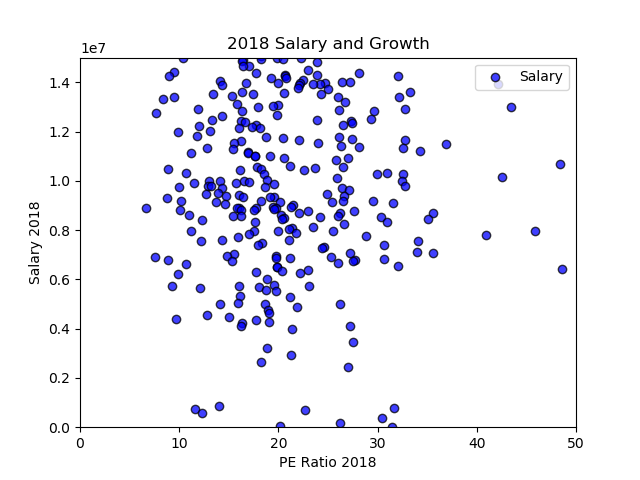

In [76]:
# Scatterplot of CEO Salary and success measured by PE Ratios

x_value = sector_ceo["PE_Ratio"]
y_axis = sector_ceo["Salary"]
x_limit = 50 #Max was 250, mean was 25, took out outliers
plt.ylim(1, 15000000) #Max is 130mil, took to down to 15mil
plt.xlim(0, x_limit) #Min is -255

x_axis = np.arange(0, x_limit, 50)

# Build the scatter plot
plt.scatter(x_value, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("2018 Salary and Growth")
plt.xlabel("PE Ratio 2018")
plt.ylabel("Salary 2018")
plt.legend(loc="upper right")

# Save Figure
plt.savefig("salary_per.png")

# Show plot
plt.show()

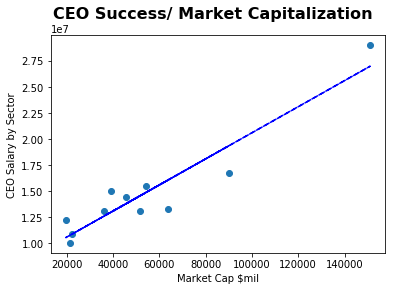

In [51]:
#Regression Analysis by Sector of PE Ratio/CEO Salary

# Set data
x_axis = avr_mktcap_sector
y_axis = avr_sal_sector

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("CEO Success/ Market Capitalization", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 50)
#ax.set_ylim(0, 50)

ax.set_xlabel("Market Cap $mil")
ax.set_ylabel("CEO Salary by Sector")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("sector_mktcap.png")

plt.show()

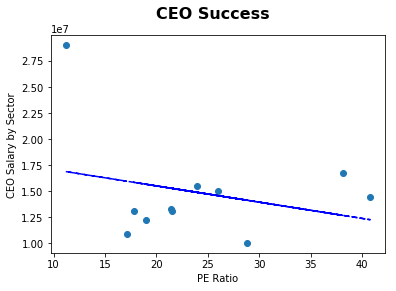

In [52]:
#Regression of salary on Market Cap

# Set data
x_axis = avr_per_sector
y_axis = avr_sal_sector

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("CEO Success", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 50)
#ax.set_ylim(0, 50)

ax.set_xlabel("PE Ratio")
ax.set_ylabel("CEO Salary by Sector")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("sector_success.png")

plt.show()